In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [63]:
df = pd.read_csv("stroke.csv")

In [64]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

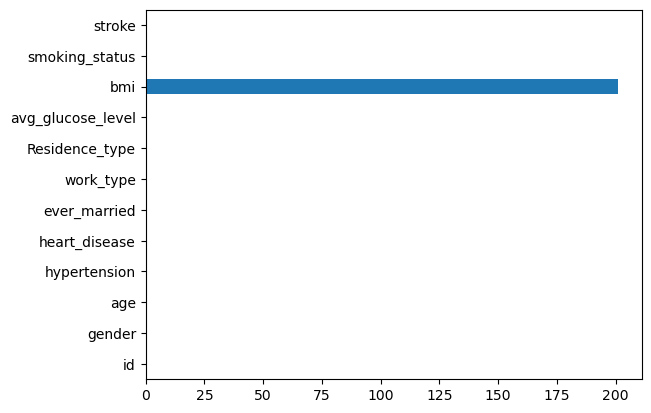

In [65]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

In [66]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [67]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)

In [68]:
# Checking the values in the gender column
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: ylabel='count'>

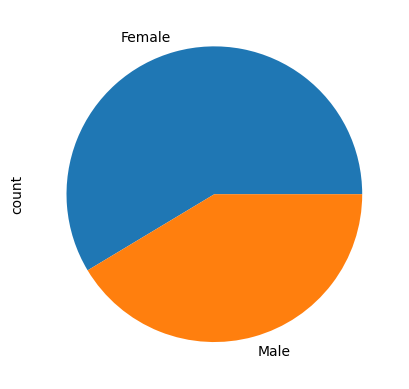

In [69]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

In [70]:
# Value count in the stroke attribute
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

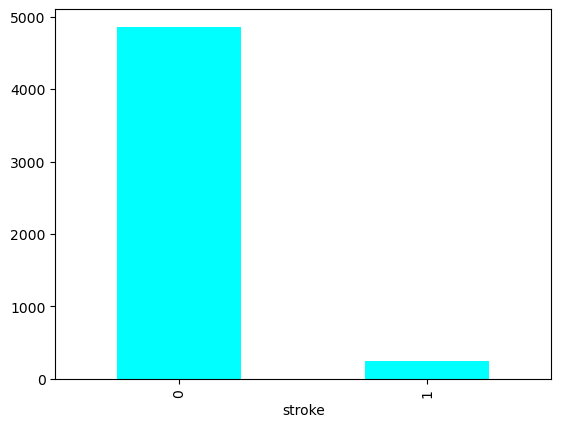

In [71]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

<Axes: xlabel='hypertension'>

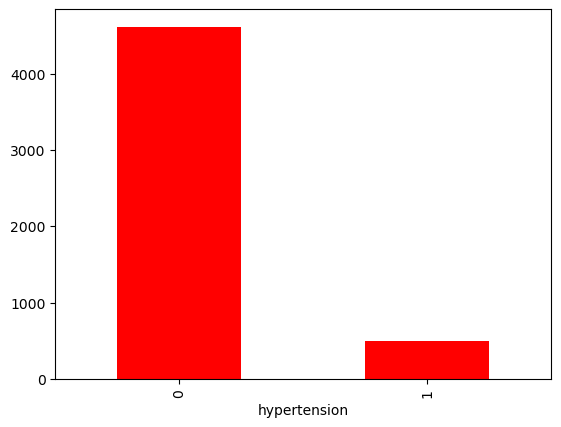

In [72]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")

In [73]:
# Value of count of work-type attribute
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

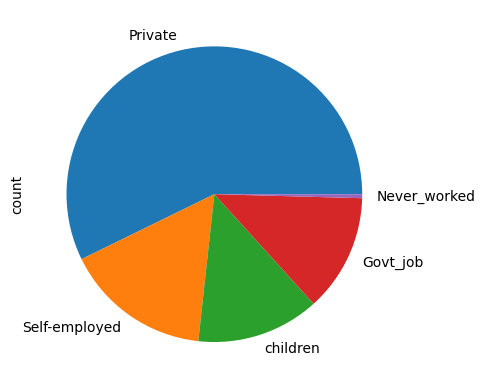

In [74]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

In [75]:

# Value of count of somoking status attribute
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

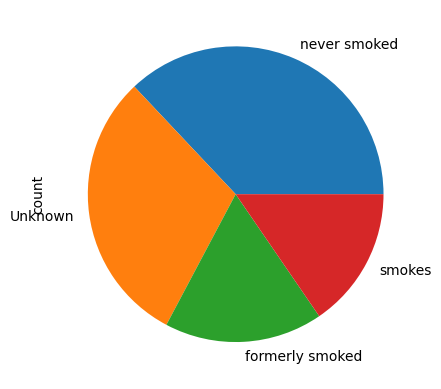

In [76]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

In [77]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

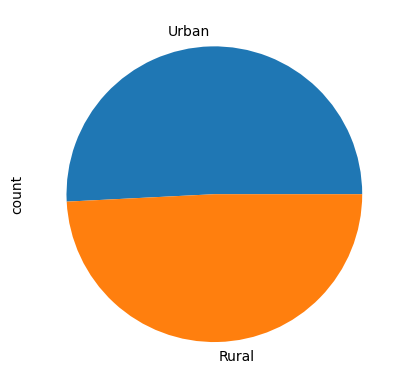

In [78]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

In [79]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Count'>

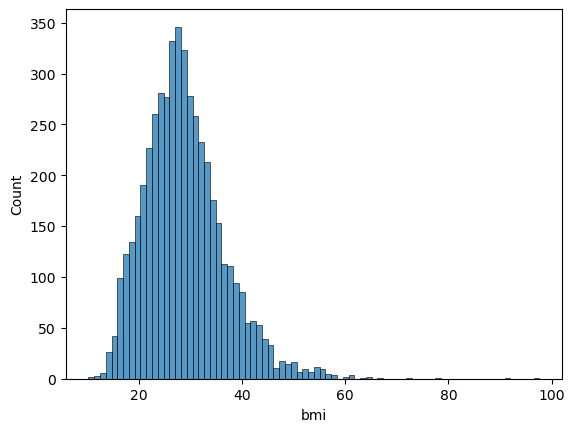

In [80]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

<Axes: >

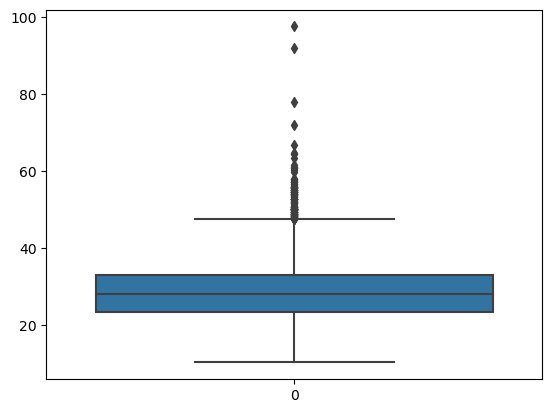

In [81]:
sns.boxplot(data=df['bmi'])

In [82]:

# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

bmi
False    5000
True      110
Name: count, dtype: int64

In [83]:
# Percentage of NULL values in bmi
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

In [84]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [85]:
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

4.87279843444227

In [86]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [87]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


<Axes: xlabel='age', ylabel='Count'>

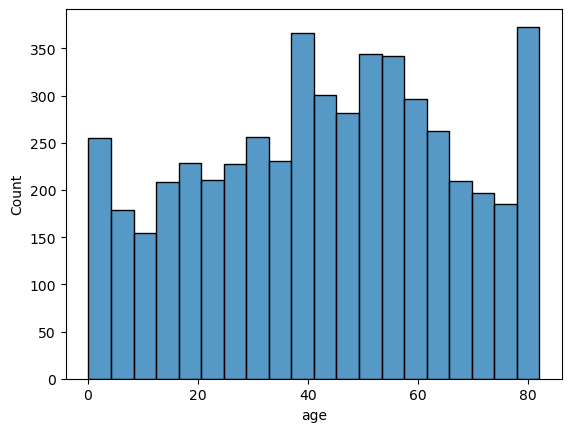

In [88]:
# Graphical representation fo the data in age column
# histogram
sns.histplot(data=df['age'])

<Axes: >

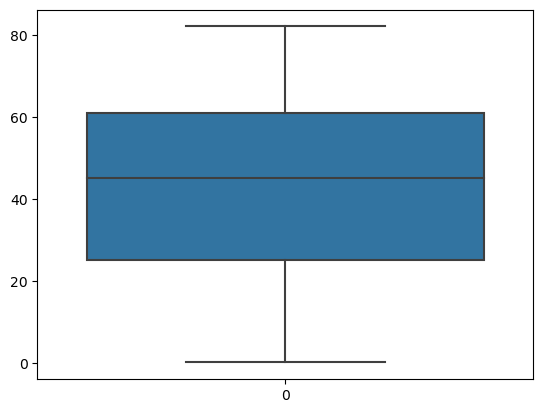

In [89]:
# boxplot
sns.boxplot(data=df['age'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

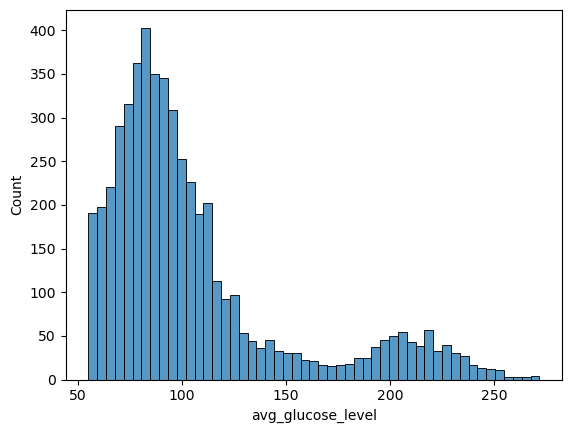

In [90]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<Axes: >

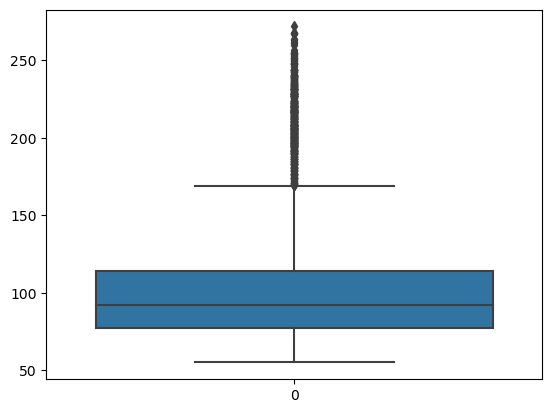

In [91]:
# Boxplot
sns.boxplot(data=df['avg_glucose_level'])

In [44]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

In [45]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [94]:
gender=enc.fit_transform(df['gender'])

In [95]:
smoking_status=enc.fit_transform(df['smoking_status'])

In [96]:
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [97]:
df['work_type']=work_type

In [98]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

In [99]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


<Axes: >

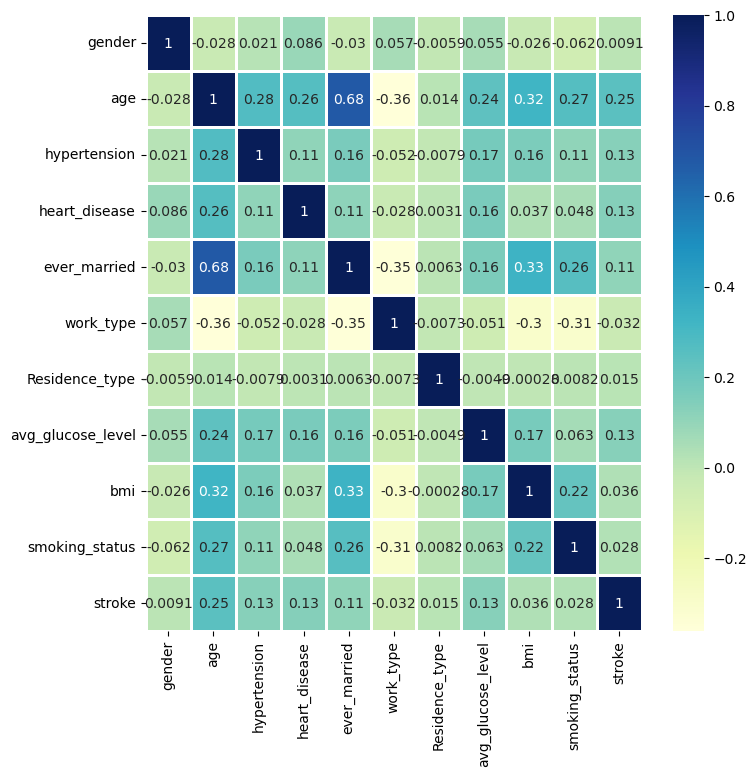

In [147]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=df.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

In [101]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<Axes: ylabel='count'>

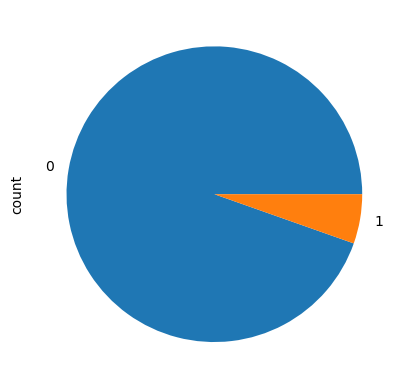

In [102]:
df['heart_disease'].value_counts().plot(kind="pie")

In [103]:
# Value count of evver married attribute
df['ever_married'].value_counts()

ever_married
1    3353
0    1757
Name: count, dtype: int64

<Axes: ylabel='count'>

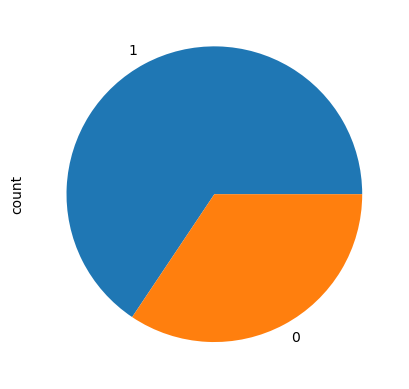

In [104]:
df['ever_married'].value_counts().plot(kind="pie")

<Axes: xlabel='stroke', ylabel='count'>

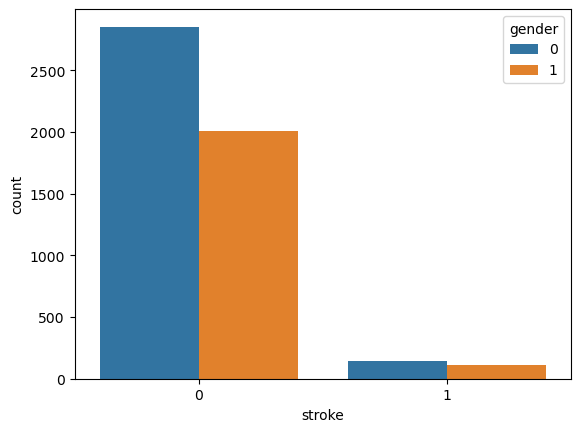

In [105]:
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

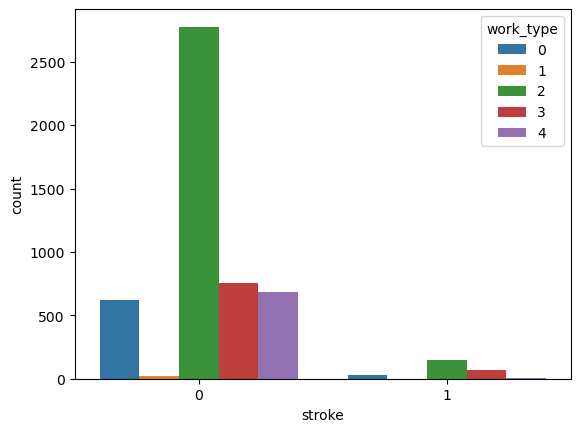

In [106]:

# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

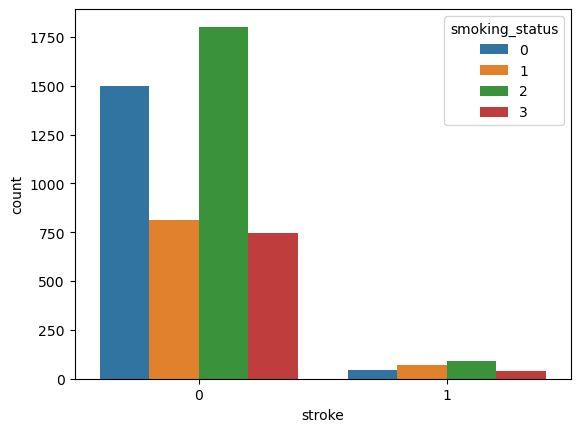

In [107]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

<Axes: xlabel='stroke', ylabel='count'>

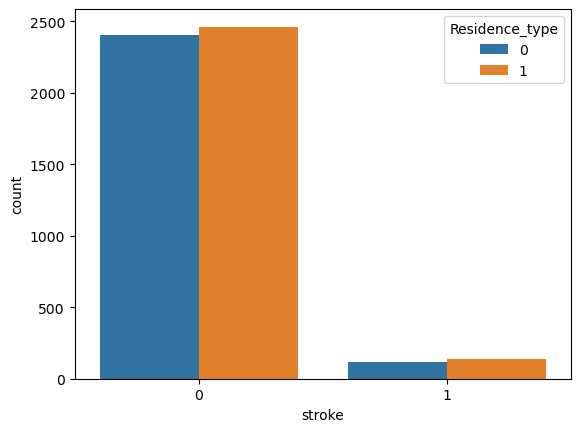

In [108]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

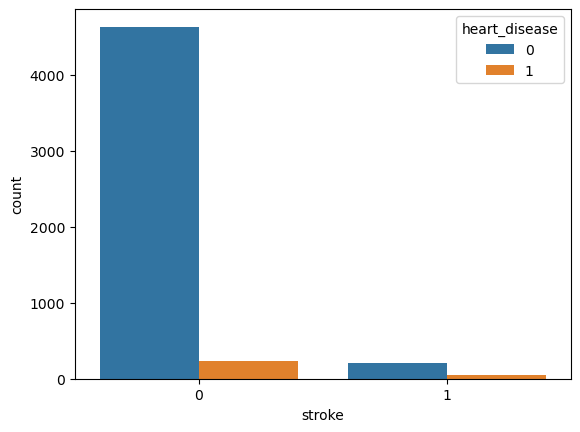

In [109]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

<Axes: xlabel='stroke', ylabel='count'>

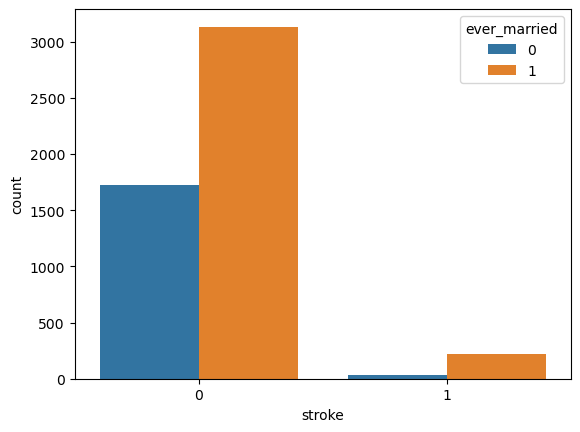

In [110]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

In [111]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [123]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes


In [124]:
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

In [125]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.005086,1,1
1,0,0.786070,0,0,1,3,0,2.121559,-0.098981,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,0.472536,2,1
3,0,0.255342,0,0,1,2,1,1.437358,0.719327,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-0.631531,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.626390,1,0,1,2,1,-0.494658,-0.098981,2,0
5106,0,1.670617,0,0,1,3,1,0.420775,1.446713,2,0
5107,0,-0.363842,0,0,1,3,0,-0.511443,0.225745,2,0
5108,1,0.343796,0,0,1,2,0,1.328257,-0.423706,1,0


In [127]:
X=df.drop('stroke',axis=1)

In [128]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.051434,0,1,1,2,1,2.706375,1.005086,1
1,0,0.786070,0,0,1,3,0,2.121559,-0.098981,2
2,1,1.626390,0,1,1,2,0,-0.005028,0.472536,2
3,0,0.255342,0,0,1,2,1,1.437358,0.719327,3
4,0,1.582163,1,0,1,3,0,1.501184,-0.631531,2


In [130]:
Y=df['stroke']

In [131]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [133]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,0.255342,0,0,1,2,0,-0.585428,-0.098981,3
4733,1,1.051434,0,0,1,2,0,-0.507688,-0.436696,1
3905,1,1.537935,0,0,1,2,1,2.268204,-0.579575,1
4700,1,0.166887,0,0,1,2,0,0.088171,0.212756,3
4939,0,0.697615,0,0,1,2,1,-0.774478,-0.098981,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,0.830297,0,0,1,2,0,-0.520718,0.927152,1
3441,0,0.697615,0,0,1,3,1,-0.355300,0.004931,3
1344,1,0.166887,0,0,1,2,0,-0.436795,1.342801,3
4623,1,-0.806115,0,0,1,0,1,1.330245,-0.748432,2


In [134]:
Y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: int64

In [135]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,0.653388,0,0,1,2,0,-0.126497,1.381768,3
1141,1,0.609161,0,0,1,2,0,-0.355300,0.121832,0
146,1,0.962980,0,0,1,3,1,-0.833004,-0.098981,1
3883,0,-1.839267,0,0,0,4,1,-0.800759,-1.397883,0
1044,0,1.582163,0,0,1,0,1,-0.270714,0.199767,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,0.697615,0,0,1,2,1,-1.011452,-0.384739,1
4712,1,0.609161,0,0,1,2,1,-0.289486,0.043898,2
4971,0,0.874525,0,0,1,2,1,-1.084113,1.173943,2
2224,1,0.609161,0,0,1,2,0,-0.659635,0.329657,1


In [136]:
X_train_std=s.fit_transform(X_train)
X_test_std=s.transform(X_test)

In [137]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
        -0.09700827,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.43641428, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58000913, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.35199431,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.74971213,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16227866,  0.57983503]])

In [138]:
X_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ..., -0.12678509,
         1.39115654,  1.51158251],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.35586361,
         0.12491104, -1.28365994],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -0.83414241,
        -0.09700827, -0.35191245],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ..., -1.08555387,
         1.1822913 ,  0.57983503],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.66056457,
         0.33377628, -0.35191245],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.75962556,
        -1.31103746, -1.28365994]])

In [144]:
# Checking the size of the splits 
print('X_train_std:', X_train_std.shape)
print('Y_train:', Y_train.shape)
print('X_test_std:', X_test_std.shape)
print('y_test:', Y_test.shape)

X_train_std: (4088, 10)
Y_train: (4088,)
X_test_std: (1022, 10)
y_test: (1022,)


In [146]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train_std,Y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test_std)
y_pred_prob_knn = knn.predict_proba(X_test_std)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(Y_test, y_pred_knn)
print('Accuracy:',accuracy_score(Y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(Y_test, y_pred_prob_knn))

Accuracy: 0.9373776908023483
ROC AUC Score: 0.5533434139784946
